# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(개정판) 교재의 소스 코드**
## *5장 통계 데이터와 시본 라이브러리*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.

### 5.1 데이터 사이의 관련성을 알아보자

### 5.2 데이터 사이의 상관관계와 인과관계

### 5.3 상관계수를 구하고 시각화를 하도록 하자

In [ ]:
import numpy as np   # 반복되는 내용으로 앞으로 삭제함

np.random.seed(85)   # 동일한 결과를 얻기위해 85라는 초기값 사용
x = np.arange(0, 10) # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9를 생성
y1 = x * 2           # 0, 2, 4, 6, 8, 10, 12, 14, 16, 18
np.corrcoef(x, y1)

array([[1., 1.],
       [1., 1.]])

In [ ]:
x = np.arange(0, 10) # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9를 생성
y2 = x ** 3          # x의 세제곱 값을 원소로 함
np.corrcoef(x, y2)

array([[1.        , 0.90843373],
       [0.90843373, 1.        ]])

In [ ]:
x = np.arange(0, 10)                     # 0에서 9사이의 연속적인 수를 생성
y3 = np.random.randint(0, 100, size=10)  # 0에서 1000사이 10개의 난수 생성
np.corrcoef(x, y3)

array([[ 1.        , -0.06472465],
       [-0.06472465,  1.        ]])

In [ ]:
result = np.corrcoef((x, y2, y3))
print(result)

[[ 1.          0.90843373 -0.06472465]
 [ 0.90843373  1.         -0.17528014]
 [-0.06472465 -0.17528014  1.        ]]


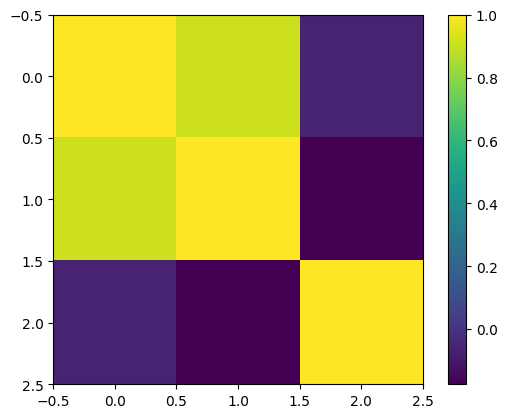

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(result)
plt.colorbar()

### 5.4 특성간의 관련성을 알려주는 상관계수와 쌍그래프

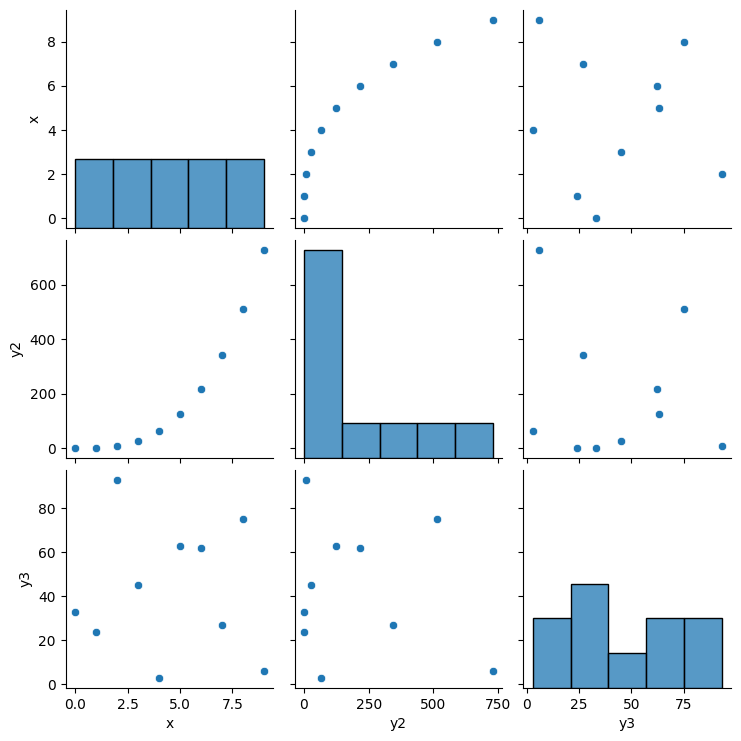

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame( {'x': x, 'y2': y2,'y3': y3})
sns.pairplot(df)

In [ ]:
print('x =', x)
print('y2 =', y2)
print('y3 =', y3)

x = [0 1 2 3 4 5 6 7 8 9]
y2 = [  0   1   8  27  64 125 216 343 512 729]
y3 = [33 24 93 45  3 63 62 27 75  6]


In [ ]:
import numpy as np
np.array?

### 5.5 시본 라이브러리 시작하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

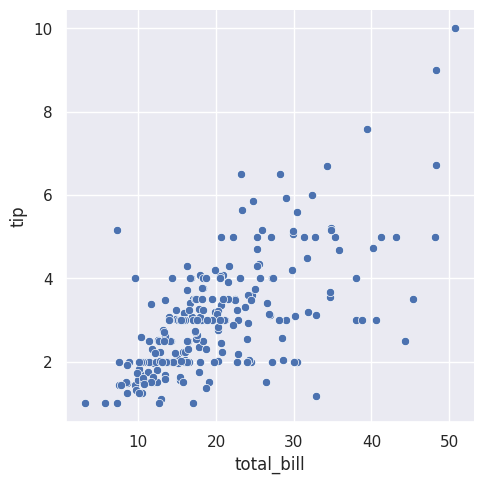

In [ ]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

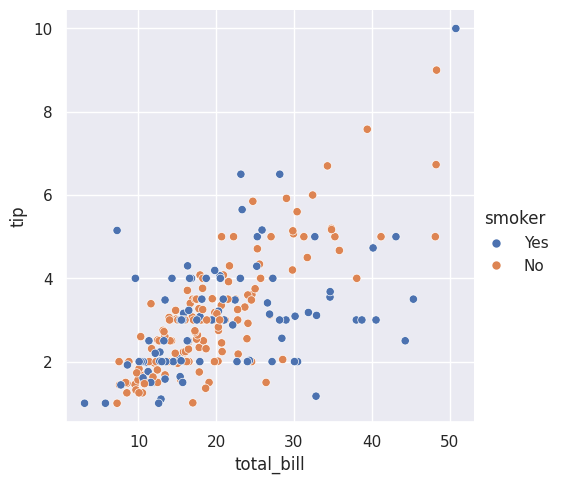

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

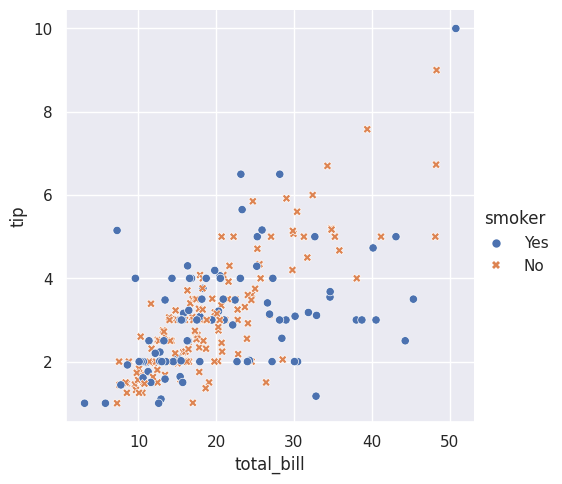

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

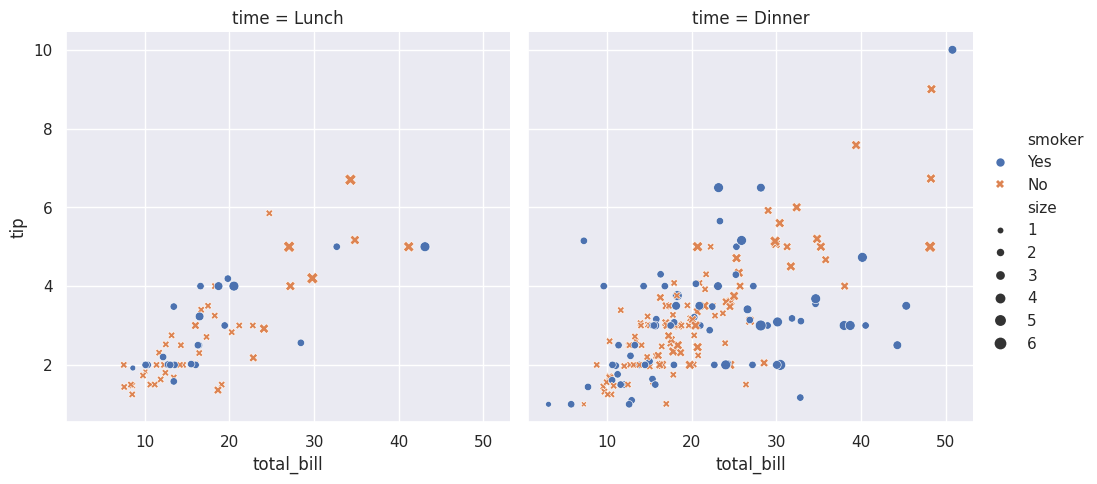

In [ ]:
import seaborn as sns

# 테마를 설정하는 기능이 있음
sns.set_theme(style="darkgrid")
# 시본에서 제공하는 팁 데이터를 가져오자
tips = sns.load_dataset("tips")

# 팁 데이터의 시각화 기능을 호출하자
sns.relplot(data=tips, x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size")

### 5.6 tips 데이터와 여러가지 시각화 방법

In [ ]:
# tips 데이터는 판다스 데이터프레임이다
tips.head(7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [ ]:
tips.shape

(244, 7)

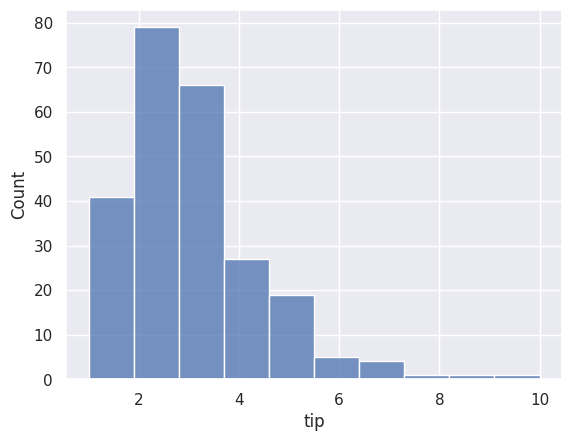

In [ ]:
sns.histplot(tips['tip'], kde=False, bins=10);

<Axes: xlabel='tip_pct', ylabel='Count'>

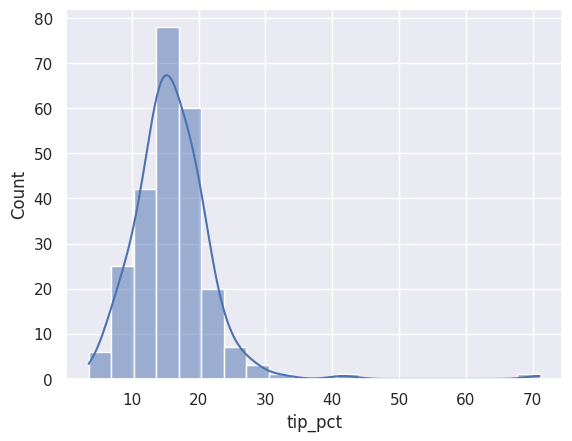

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
sns.histplot(tips['tip_pct'], kde=True, bins=20)

<Axes: xlabel='tip_pct', ylabel='Count'>

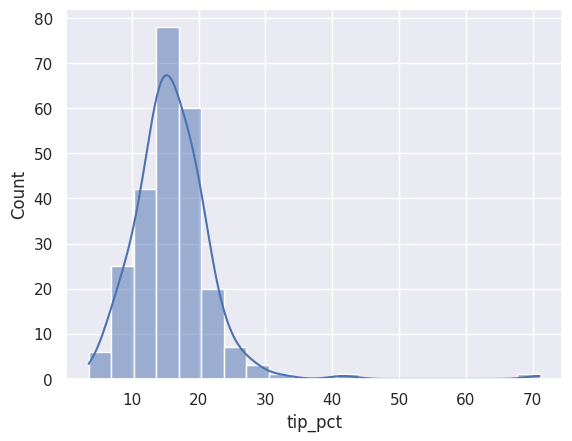

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
sns.histplot(tips['tip_pct'], kde=True, bins=20)

### 5.7 산점도 그래프로 관계를 상세하게 나타내보자

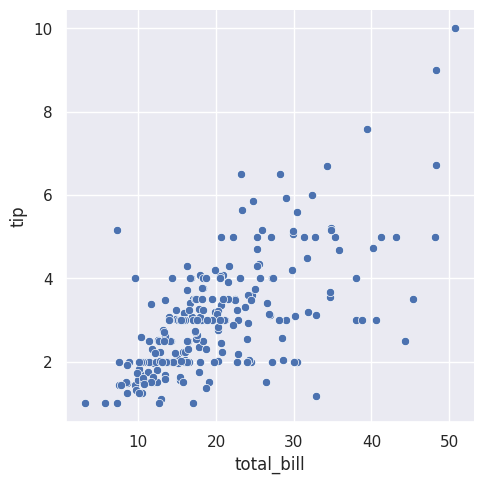

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips)

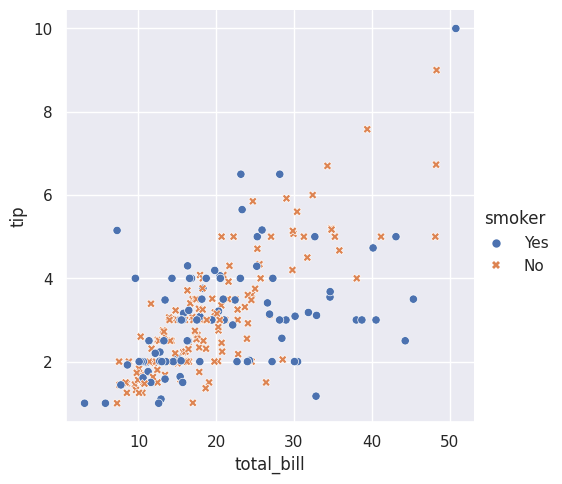

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='smoker',\
            style='smoker', data=tips)

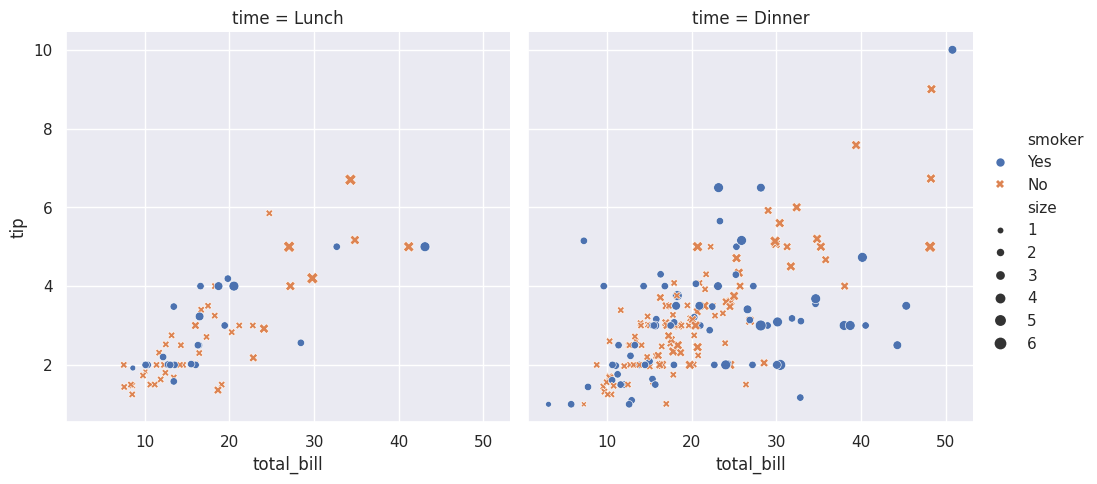

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size")

Text(0.5, 1.0, 'Total Bill and Tip')

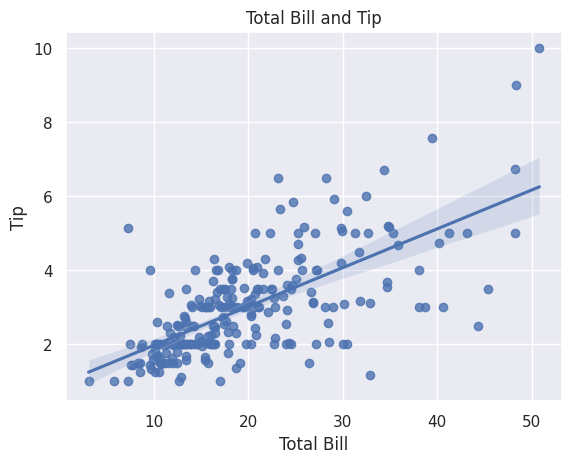

In [ ]:
ax = sns.regplot(data=tips, x='total_bill', y='tip')
ax.set_xlabel('Total Bill')  # x 축의 레이블
ax.set_ylabel('Tip')         # y 축의 레이블
ax.set_title('Total Bill and Tip')   # 그림의 제목

### 5.8 변수 사이의 관계를 알아보기에 편리한 쌍그래프

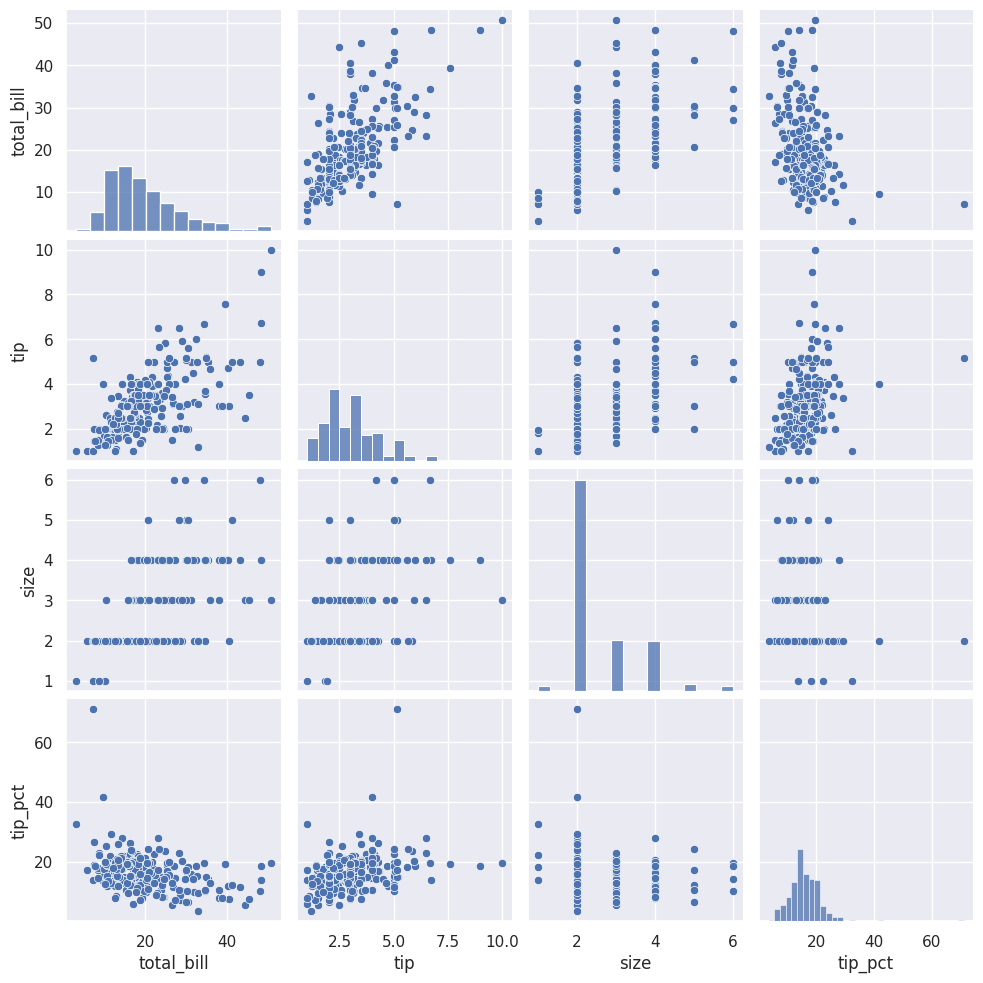

In [ ]:
sns.pairplot(tips)

### 5.9 Anscombe’s quartet 데이터 셋을 알아보자

In [ ]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe.head())

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


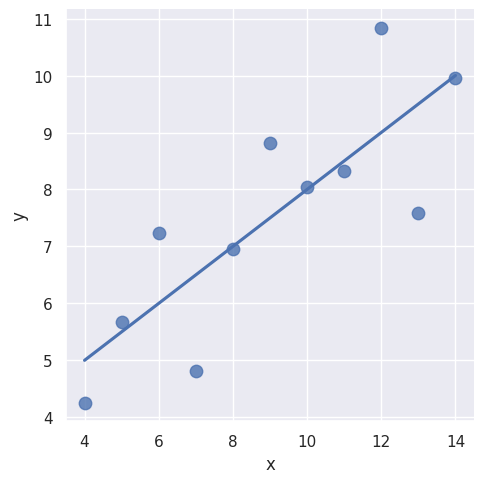

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

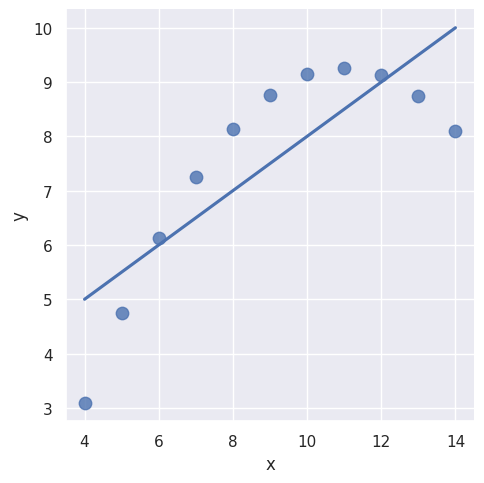

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

### 5.10 비선형 함수를 사용하여 데이터를 설명하자

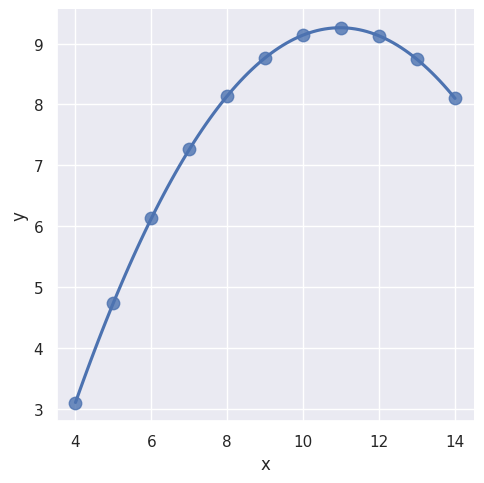

In [ ]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

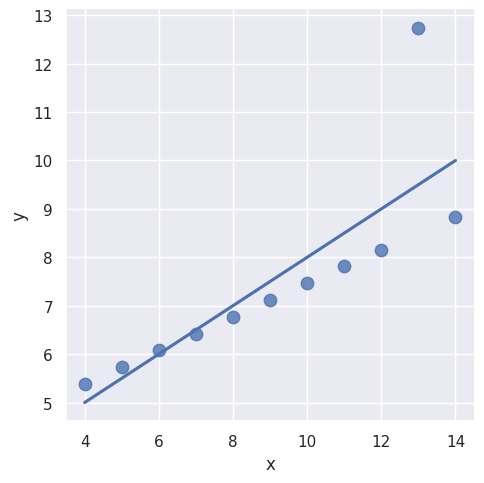

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

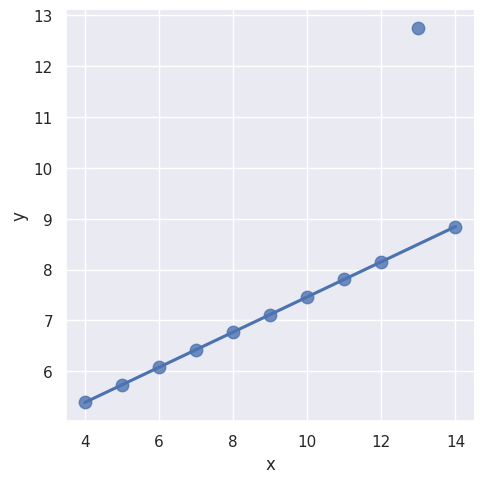

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

### 5.11 시본의 또다른 데이터 셋 : flights 데이터 셋

In [ ]:
import seaborn as sns

# seaborn에서 제공하는 flights 데이터 셋을 로딩함
flights = sns.load_dataset('flights')
flights.shape  # 데이터의 형상을 살펴보자

(144, 3)

In [ ]:
flights.head()  # 최초 5개의 데이터를 살펴보자

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Figure size 1000x300 with 0 Axes>

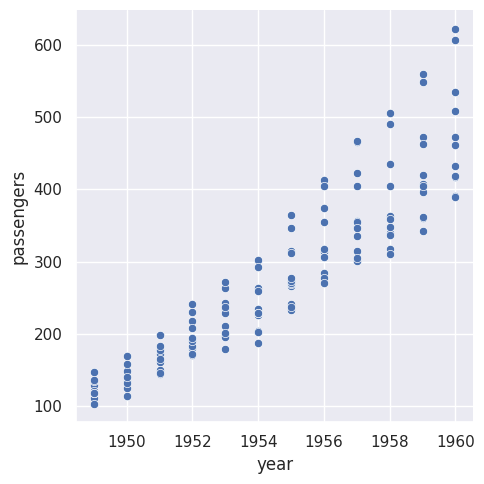

In [ ]:
plt.figure(figsize=(10, 3))
sns.relplot(data=flights, x="year", y="passengers")

<Figure size 1000x300 with 0 Axes>

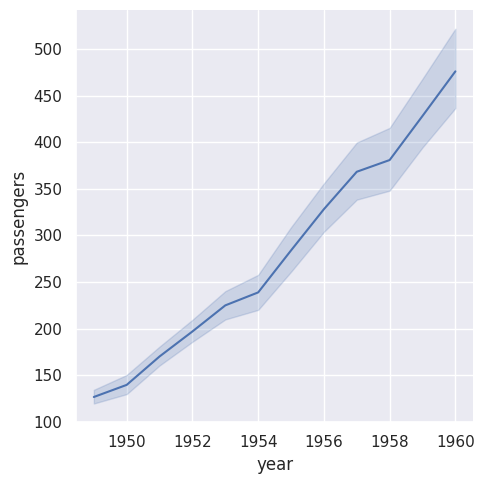

In [ ]:
plt.figure(figsize=(10, 3))
sns.relplot(data=flights, x="year", y="passengers", kind="line")